## Import Libraries

In [1]:
#import necessary libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')


## Import the dataset and make a copy

In [2]:
data=pd.read_csv('CardioGoodFitness.csv') #import dataset
df = data.copy() #make a copy of data


## Perform intial observations of data set

In [3]:
#check data head to get a general sense of the dataset
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


**Observations**
 
* Product, Gender, and MaritalStatus appear to be categorical values
* Education is given as a number but there is no explanation as to what it means
* Usage assumption is number of times per week
* It's unclear how Fitness is calculated
* Assumption is Income is annual earnings
* Assumption is Miles is calculated on a per week basis



In [4]:
#check data tail to ensure no summary rows or anomolies
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


**Observations**

* There are no summary lines
* There are at least two model numbers

In [5]:
#check data shape for number of rows and columns

df.shape

(180, 9)

In [6]:
#check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Observation**

* There are no Null Values all columns have 180 values (including the top row)
* Product, Gender, and MaritalStatus are indeed objects which must be converted into categorical values
* The remaining columns are integers

# Data Preprocessing

## Fixing the datatypes

In [7]:
df['Product'] = df.Product.astype('category') #convert Product object to category
df['Gender'] = df.Gender.astype('category') #convert Gender object to category
df['MaritalStatus'] = df.MaritalStatus.astype('category') #convert MaritalStatus object to category

df.info() #check if conversion of objects to categories was successful

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.4 KB


**Observations**

* data types of all the columns have been fixed

In [8]:
df.describe(include = 'all') #taking a look at all of the variables including categories

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


**Observations**

* Product has 3 unique categories
* Mean age is 29 years old with min of 18, max of 50 and std of 7
* Gender frequency is heavily skewed towards male with 104
* Education mean is 15.57 with a std of just 1.61
* MaritalStatus has just two categories and leans heavily toward Partnered
* Average Usage is 3.5 times per week with a min of 2 and a max of 7
* Average Fitness is reported as 3.3
* Std of incomes seems significant with a potential outlier at the top
* Miles may also have skew with outliers at the top



In [9]:
#checking frequency of Gender to test if I am reading the describe table above correctly
print(df['Gender'].value_counts()) 

Male      104
Female     76
Name: Gender, dtype: int64


# Univariate Analysis

## Start with analysis of categorical variables

<AxesSubplot:xlabel='Product', ylabel='Count'>

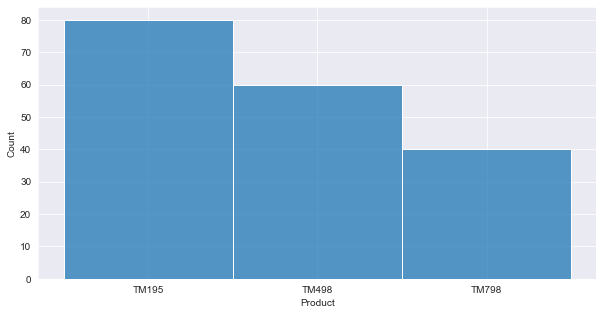

In [10]:
# check product type distribution
plt.figure(figsize=(10,5)) # set plot size to make it easier to read
sns.histplot(df.Product, palette='YlGnBu') # I like the yellow-green-blue palette and will use it wherever possible

**Observations**

* TM195 seems to be the most popular product type with 2x more in the dataset tham TM798
* Not a big fan of how the graph is displayed

<AxesSubplot:xlabel='Gender', ylabel='Count'>

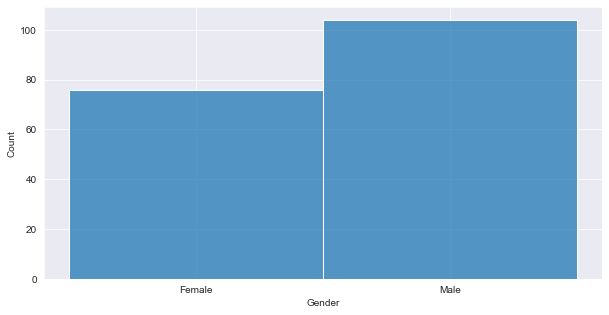

In [11]:
# check gender distribution
plt.figure(figsize=(10,5)) # set plot size to make it easier to read
sns.histplot(df.Gender)

**Observations**

* There are more males in the dataset 
* Not a big fan of how the graph is displayed

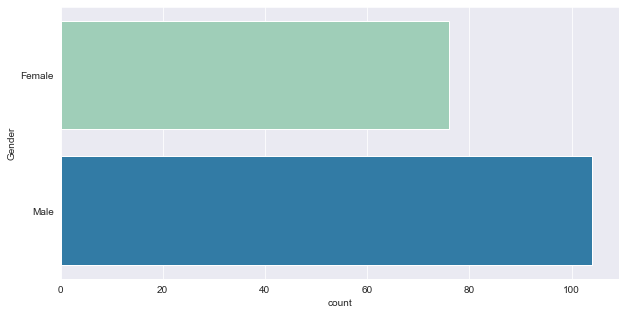

In [12]:
plt.figure(figsize=(10,5)) # set plot size to make it easier to read
sns.countplot(data = df, y='Gender', palette='YlGnBu'); #use countplot function with Gender on y-axis to improve readability
plt.show()

**Observations**
* Most customers are Married

## Looking at numerical values

In [13]:
df.describe() #run for numerical values only

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Observations**

* No missing values
* Apparent skewness in Education, Usage, Income, and Miles but will need further analysis to determine severity

In [14]:
df.median() #quick comparison to mean values in describe table above to check skewness

Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
dtype: float64

**Observations**

* Quick check appears skewness is not a huge problem but will investigate further

In [15]:
df.mode() #quick glance at the most common values

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,25,Male,16,Partnered,3,3,45480,85


In [16]:
#using function from earlier lesson to check skewness using combination graph of boxplot and histogram 

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, palette='YlGnBu') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=True, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=True, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

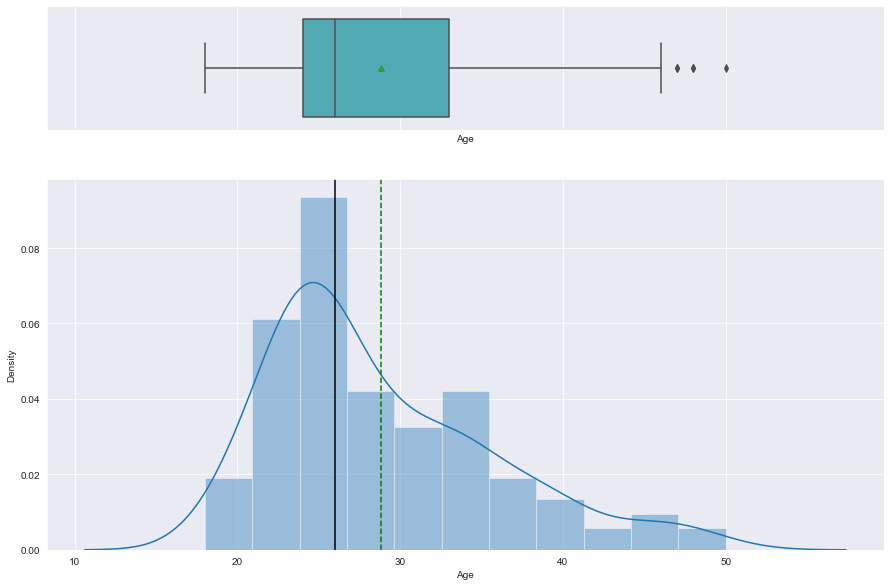

In [17]:
histogram_boxplot(df.Age) #age histogram

**Age Observations**

* Slight skew to the left but overall fairly well distributed
* Min 18, Max 50
* Mean 28.8, Median 26

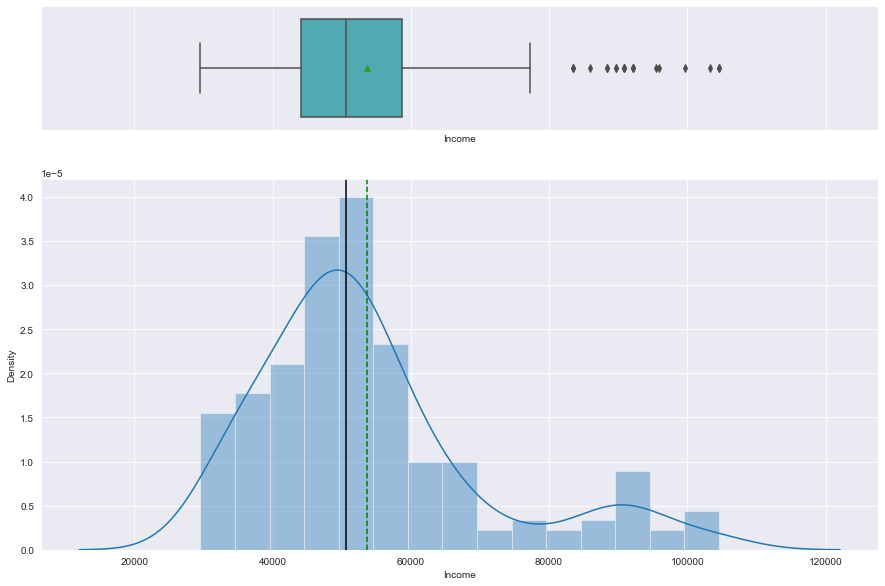

In [18]:
histogram_boxplot(df.Income) #income histogram

 **Income Observations**

* Fairly well distributed with a few outliers at the high end
* Min 29,562, Max 104,581
* Mean 53,720, Median 50,597

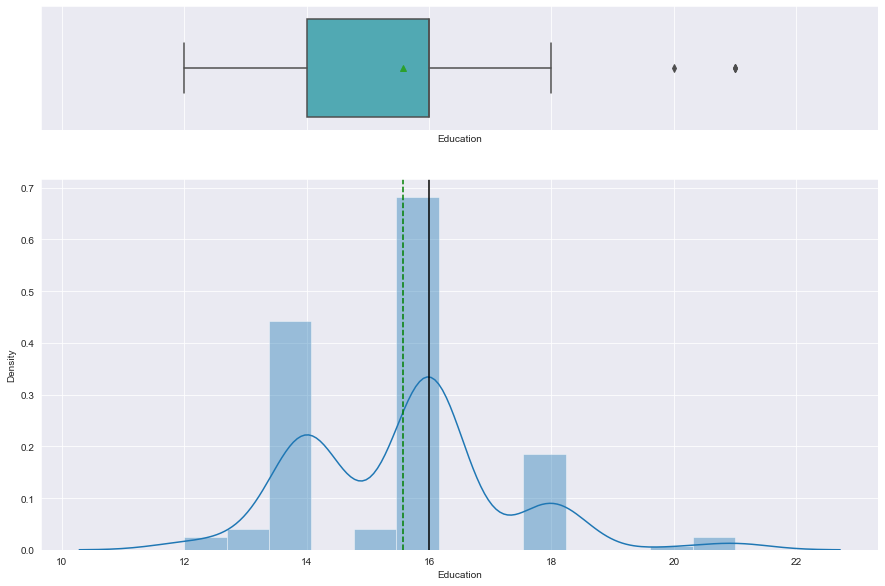

In [19]:
histogram_boxplot(df.Education) #education histogram

**Education Observations**

* Clustered around the 16 which seems to be "college graduate"


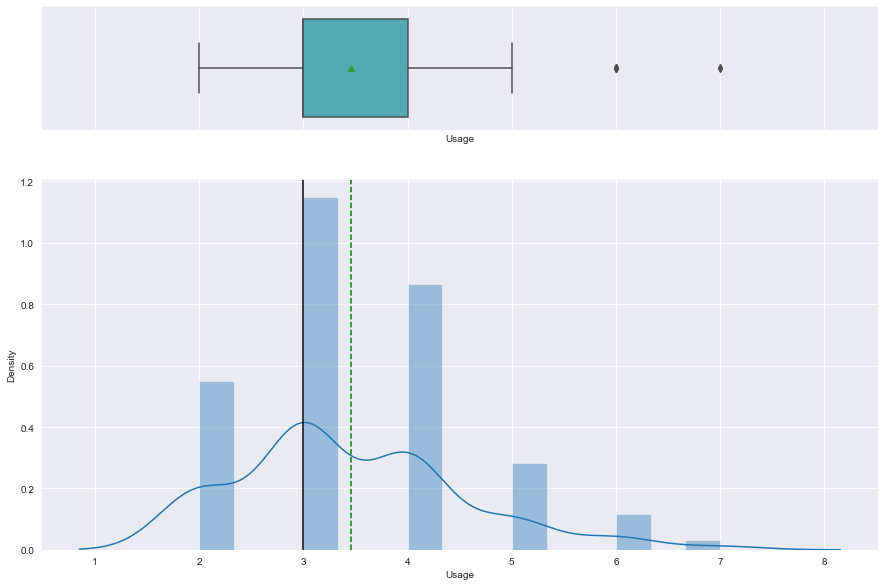

In [20]:
histogram_boxplot(df.Usage) #usage histogram

**Usage Observations**

* Most repot using the equipment on average about 3.5 times per week

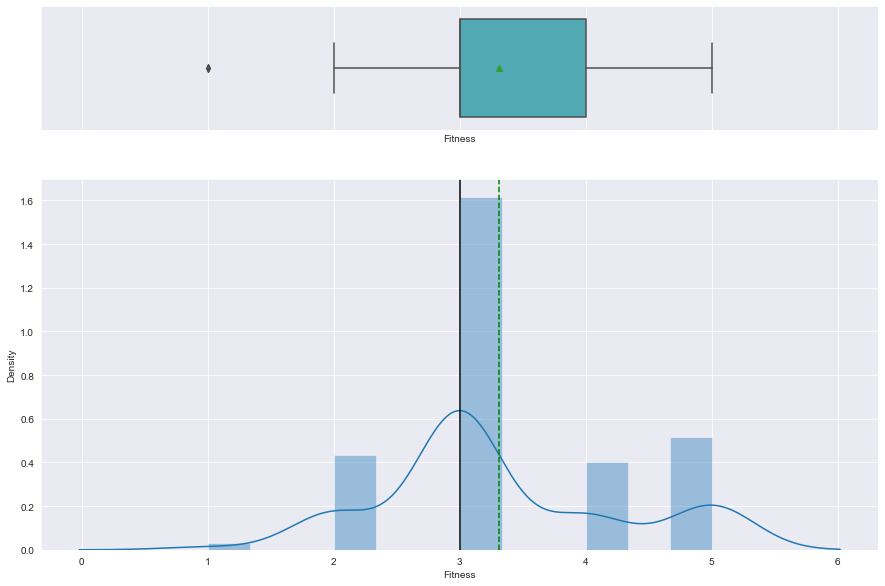

In [21]:
histogram_boxplot(df.Fitness) #fitness histogram

**Fitness Observation**

* On average users report a fitness level of 3.3 on a 5 point scale

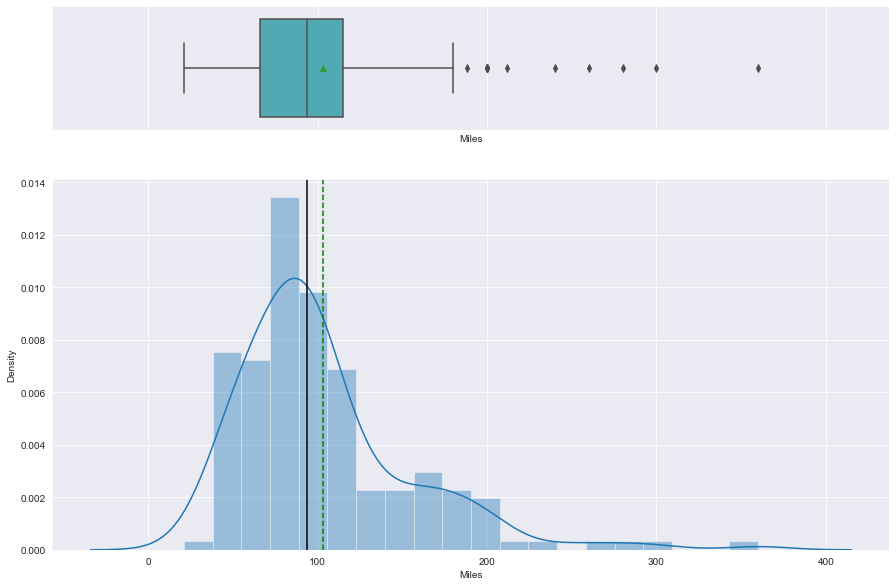

In [22]:
histogram_boxplot(df.Miles) #miles histogram

**Miles Observations**

* The average person runs 103 miles per week

## Bi-Variate and Multivariate Analysis

In [23]:
# run correlation matrix to check for relationships
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


**Observations**

* will run heatmap to get a better view

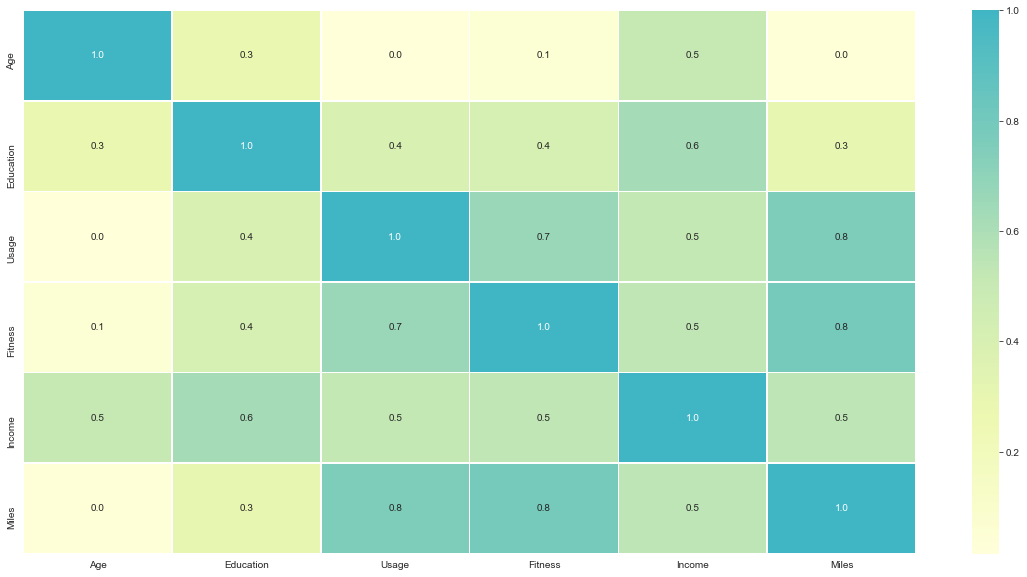

In [24]:
# heatmap of numerical values

plt.figure(figsize=(20,10)) # set size of plot
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1, cmap='YlGnBu')  # set line widths, format, and color
plt.show()

**Observations**

* Age is loosely associated with Income
* Education is a bit connected to Education
* Usage is corelated with Education, Fitness, Income, and Miles

In [25]:

# borrowed function from previous lesson
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(featureture) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 20) # annotate the percantage
        

In [26]:
print(plt.style.available) #check availble plot styles

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [27]:
plt.style.use('seaborn-pastel') # set plot style to seaborn-pastel

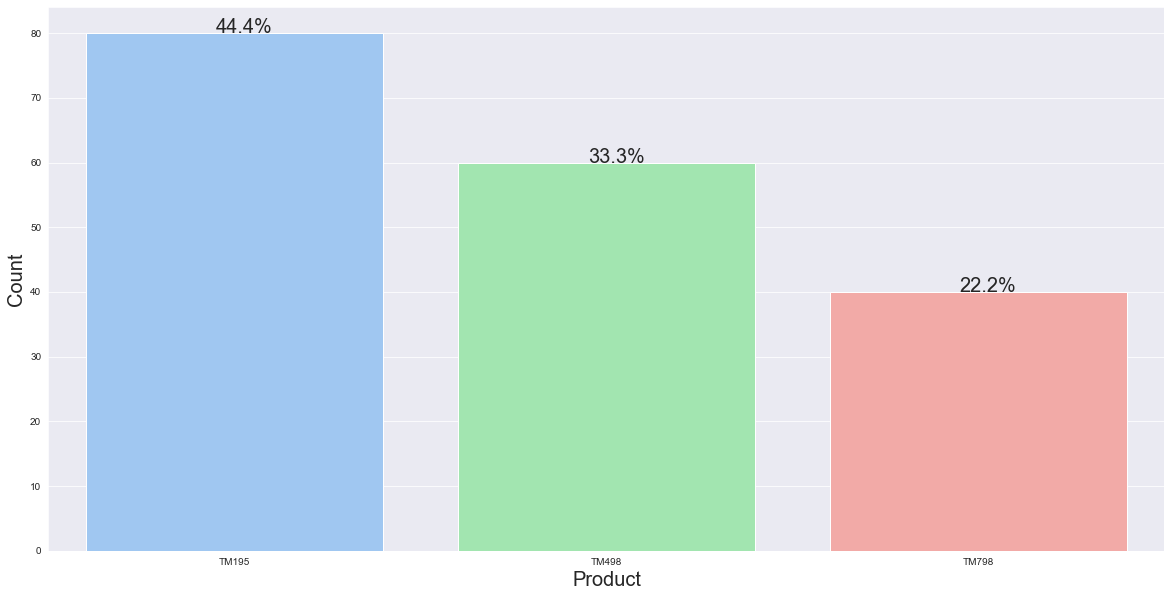

In [28]:
# call bar_perc function and run countplot of product types with percentage total

plt.figure(figsize=(20,10))

ax = sns.countplot(df['Product'])
plt.xlabel('Product', fontsize=20)
plt.ylabel('Count', fontsize=20)
bar_perc(ax,df['Product'])

**Observations**

* Looks a lot better with perentage added to end of columns

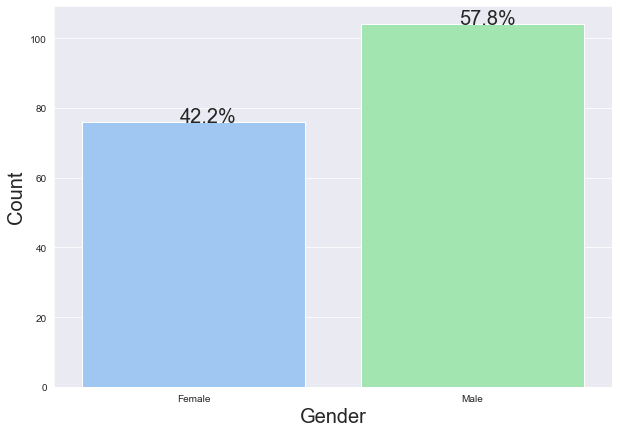

In [29]:
# call bar_perc function and run countplot of Gender with percentage total


plt.figure(figsize=(10,7))
ax = sns.countplot(df['Gender'])
plt.xlabel('Gender', fontsize=20)
plt.ylabel('Count', fontsize=20)
bar_perc(ax,df['Gender'])


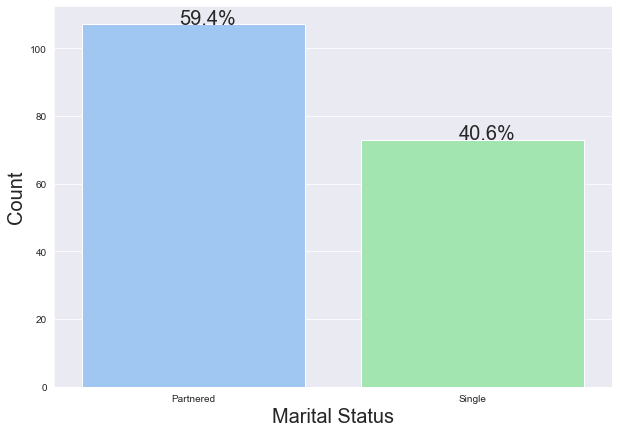

In [30]:
# call bar_perc function and run countplot of Marital Status with percentage total


plt.figure(figsize=(10,7))
ax = sns.countplot(df['MaritalStatus'])
plt.xlabel('Marital Status', fontsize=20)
plt.ylabel('Count', fontsize=20)
bar_perc(ax,df['MaritalStatus'])

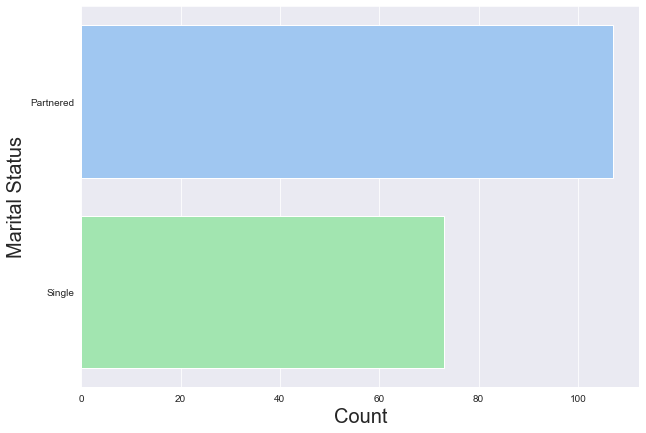

In [31]:
# run countplot of Marital Status with horizontal orientation


plt.figure(figsize=(10,7))
ax = sns.countplot(data=df,y='MaritalStatus') # create horizontal bar by using y axis
plt.xlabel('Count', fontsize=20)
plt.ylabel('Marital Status', fontsize=20);


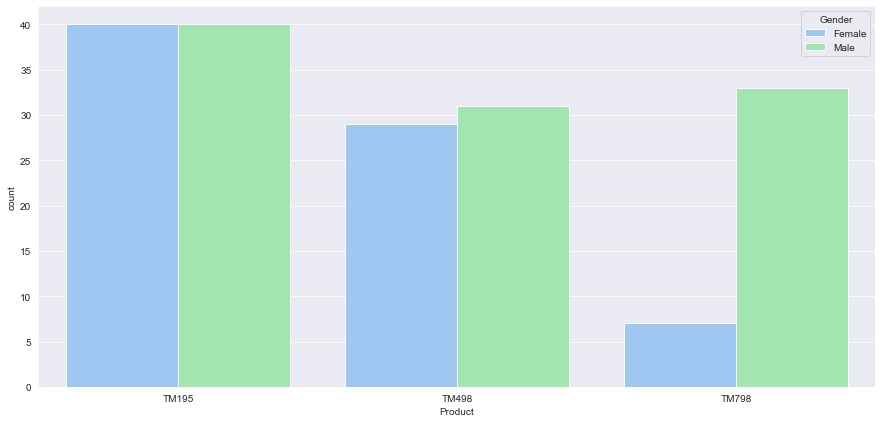

In [32]:
# comparing gender and product

plt.figure(figsize=(15,7))
sns.countplot(x='Product', hue='Gender', data=df);

**Observations**
* Females favor TM195 and disfavor TM798
* Males are mostly agnostic in terms of Product Type

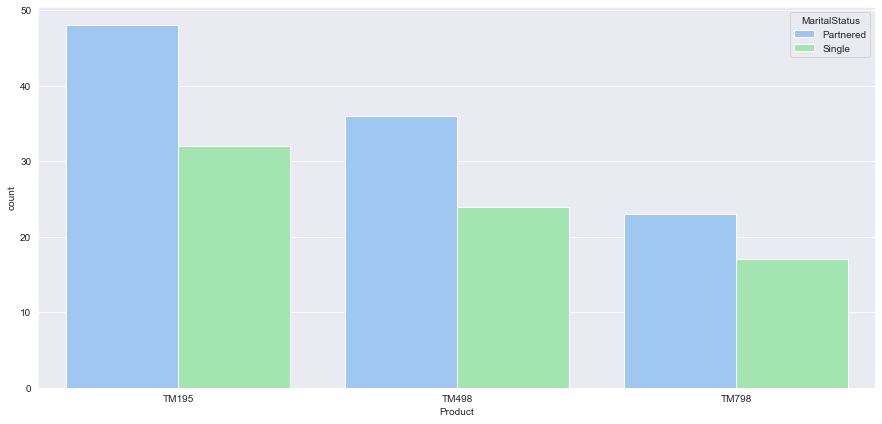

In [33]:
# comparing marital status aind product choice

plt.figure(figsize=(15,7))
sns.countplot(x='Product', hue='MaritalStatus', data=df);

**Observations**
* Married customers tend to purchase TM195

<AxesSubplot:xlabel='Gender', ylabel='Income'>

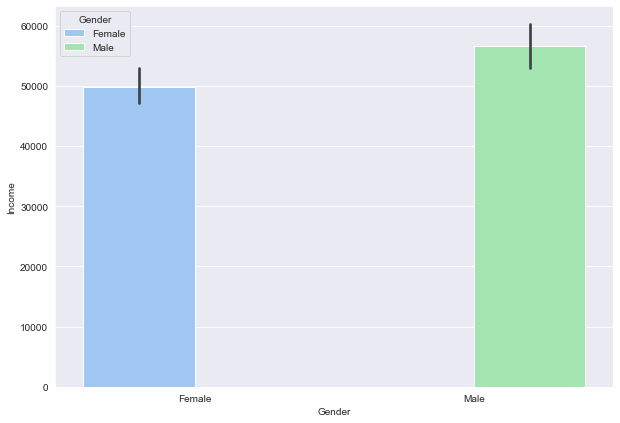

In [34]:
# comparing income and gender

plt.figure(figsize=(10,7))
sns.barplot(x='Gender', y='Income', hue='Gender', data=df)

**Observations**
* Males earn more income

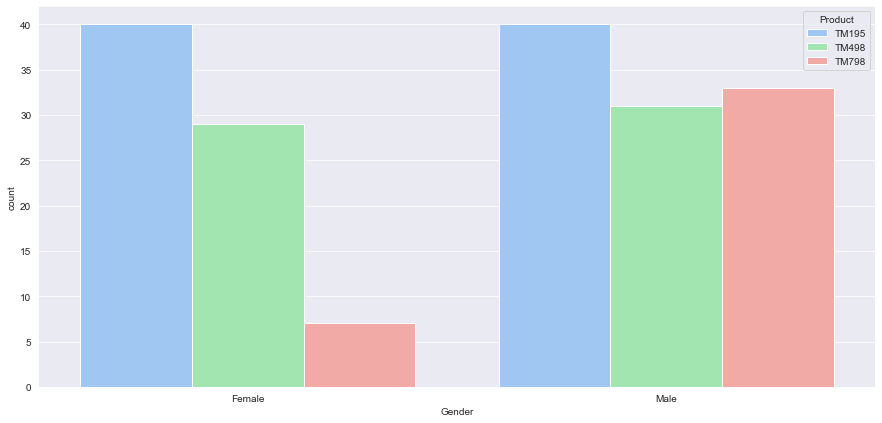

In [35]:
# comparing gender and product type

plt.figure(figsize=(15,7))
ax = sns.countplot(data=df, x='Gender', hue='Product');


**Observations**
* Gender distribution in terms of product types is evenly distributes with the exception of TM798 which is mostly purchased by men

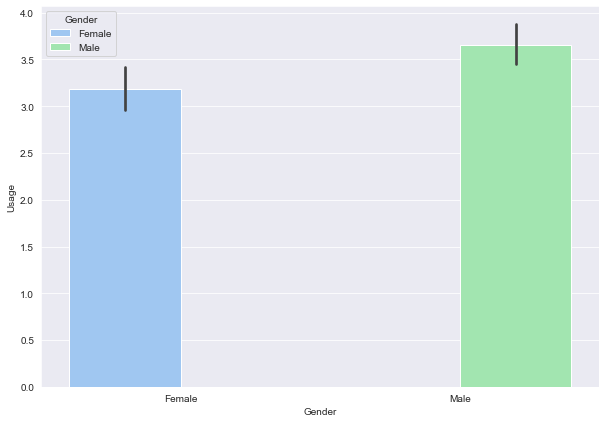

In [36]:
# comparing gender and usage

plt.figure(figsize=(10,7))
sns.barplot(x='Gender', y='Usage', hue='Gender', data=df);

**Observations**
* Men report slightly higher usage than women

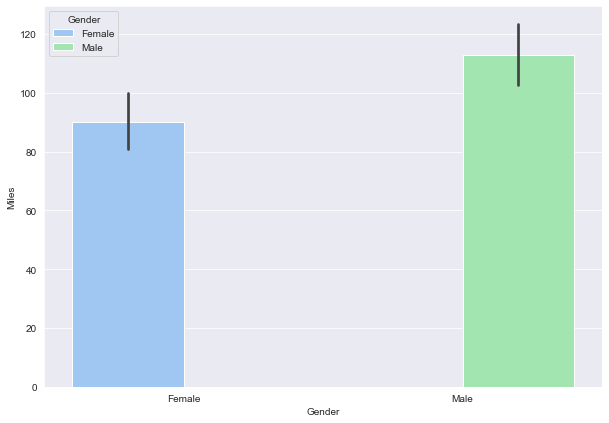

In [37]:
# comparing gender and miles

plt.figure(figsize=(10,7))
sns.barplot(x='Gender', y='Miles', hue='Gender', data=df);

**Observations**
* Men tend to report more miles than women

In [38]:
# run pandas profiling to double check any missed variable relationsh

#import pandas_profiling
import pandas_profiling 

In [39]:
pandas_profiling.ProfileReport(df)

# 

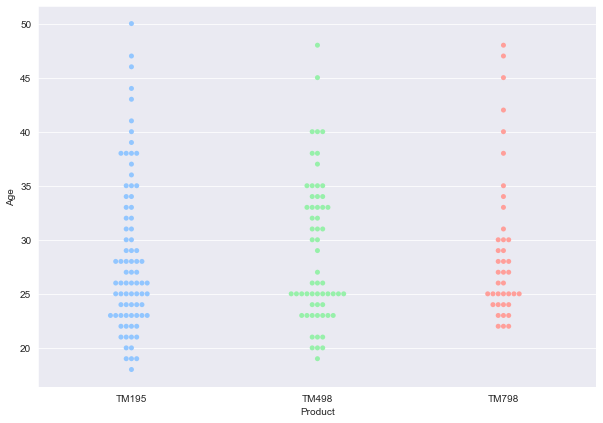

In [40]:
# comparing product to age

plt.figure(figsize=(10,7))
sns.swarmplot(df['Product'], df['Age']);

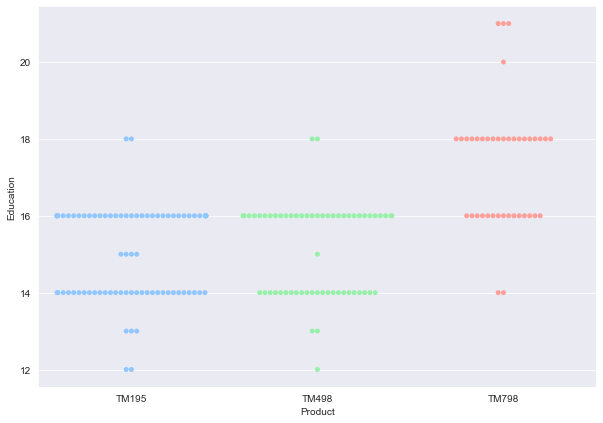

In [41]:
# comparing product to education

plt.figure(figsize=(10,7))
sns.swarmplot(df['Product'], df['Education']);

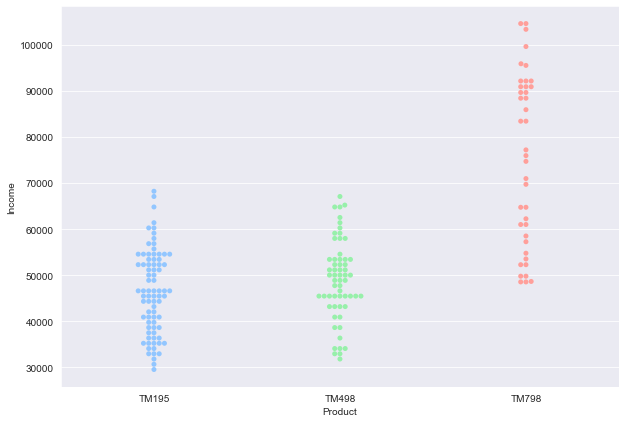

In [42]:
# comparing product to income

plt.figure(figsize=(10,7))
sns.swarmplot(df['Product'], df['Income']);

<Figure size 1080x1080 with 0 Axes>

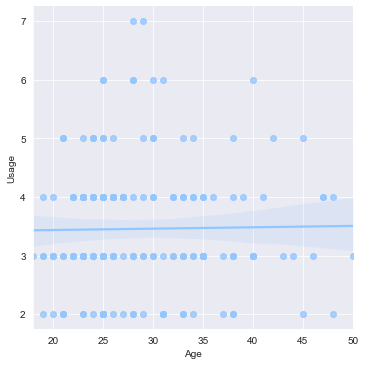

In [43]:
# comparing usage and age

plt.figure(figsize=(15,15))
sns.lmplot(y='Usage', x='Age', data=df);

<Figure size 1080x1080 with 0 Axes>

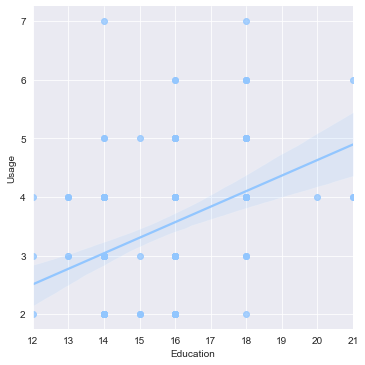

In [44]:
# comparing usage and education

plt.figure(figsize=(15,15))
sns.lmplot(y='Usage', x='Education', data=df);

<Figure size 1080x1080 with 0 Axes>

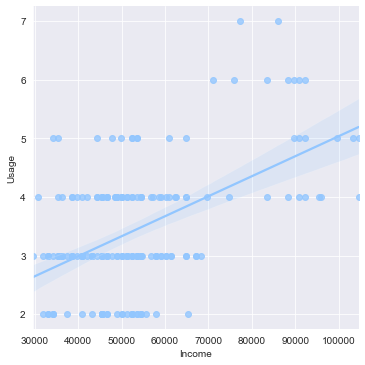

In [45]:
# comparing usage and income

plt.figure(figsize=(15,15))
sns.lmplot(y='Usage', x='Income', data=df);

<Figure size 1080x1080 with 0 Axes>

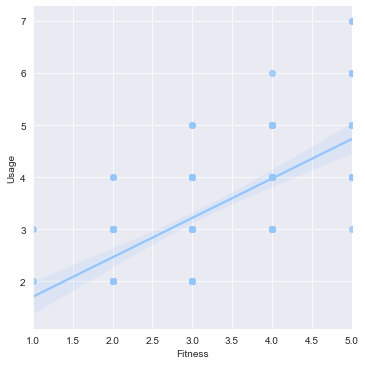

In [46]:
# comparing usage and fitness

plt.figure(figsize=(15,15))
sns.lmplot(y='Usage', x='Fitness', data=df);

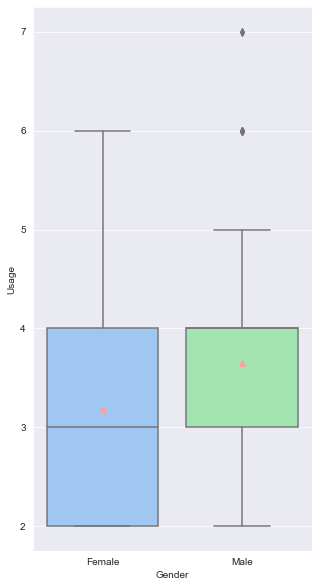

In [47]:
# Boxplot to compare usage and gender
plt.figure(figsize=(5,10))           
sns.boxplot(df['Gender'],df['Usage'], showmeans=True);

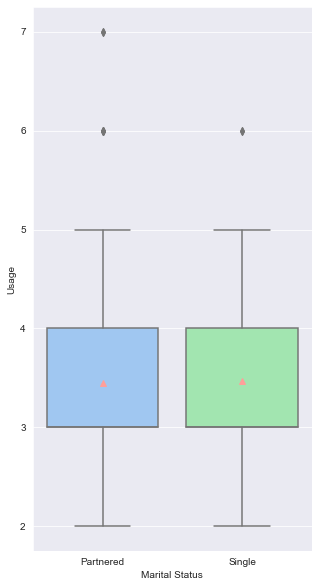

In [48]:
# Boxplot to compare usage and marital status
plt.figure(figsize=(5,10)) 

sns.boxplot(df['MaritalStatus'],df['Usage'], showmeans=True);
plt.xlabel('Marital Status');

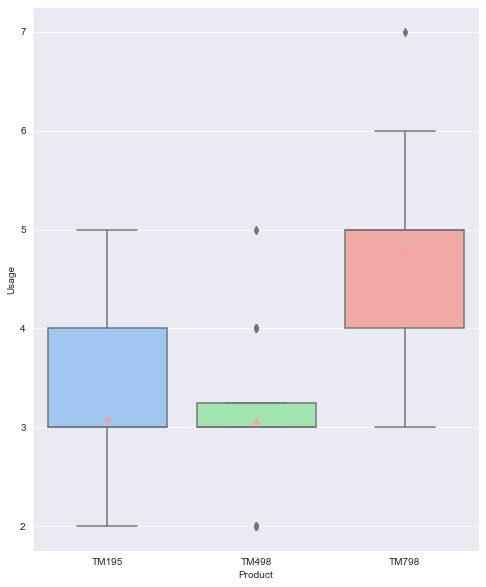

In [49]:
# Boxplot to compare usage and product type
plt.figure(figsize=(8,10))           
sns.boxplot(df['Product'],df['Usage'], showmeans=True);

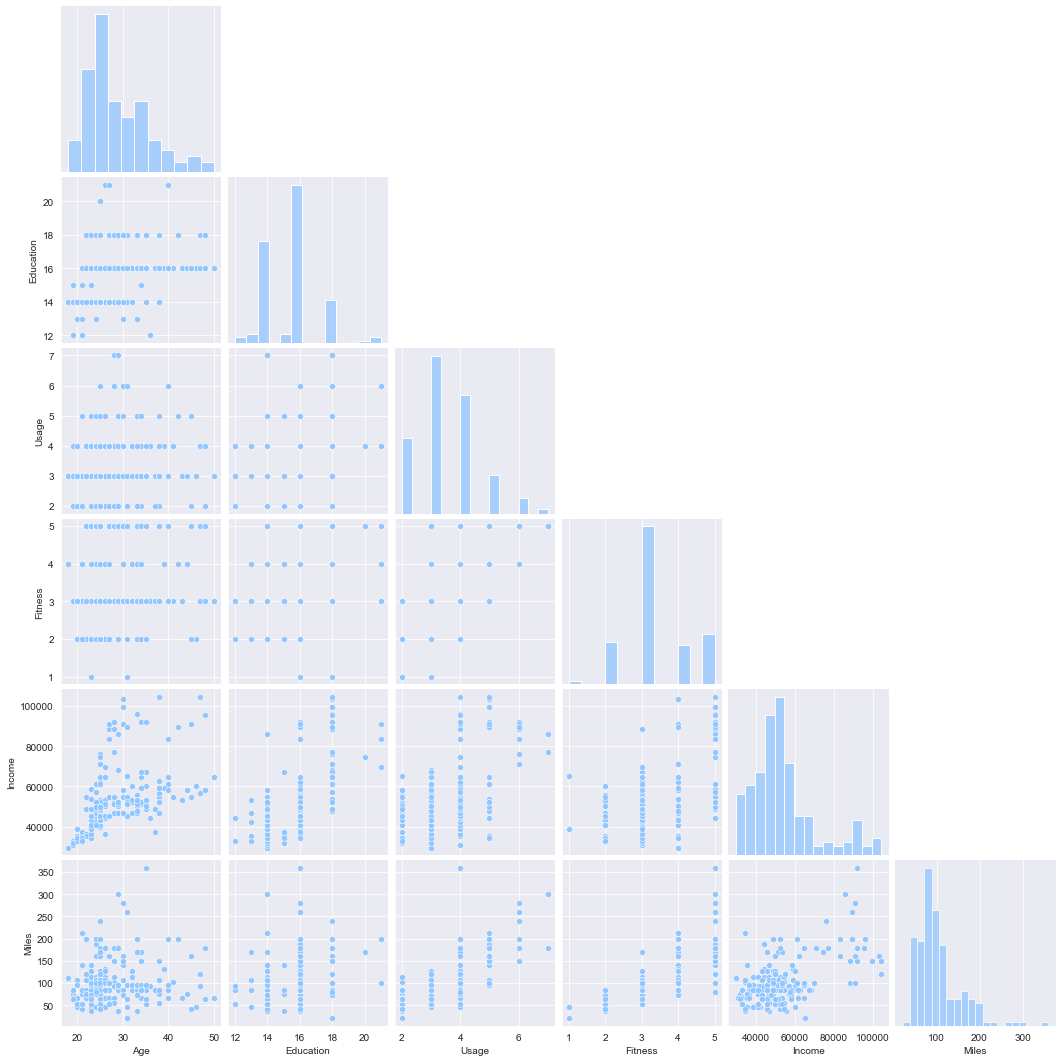

In [50]:
# run pair plot to double check numerical value relationships
sns.pairplot(df, corner=True) #pair plot minus the corner

In [51]:
# use pandas function get-dummies to hot encode categorical values to run additional correlation analysis

df1 = pd.get_dummies(df) # set new dataset with categorical encoding to df1

In [52]:
# run correlation on new dataset

df1.corr()

,Age,Education,Usage,Fitness,Income,Miles,Product_TM195,Product_TM498,Product_TM798,Gender_Female,Gender_Male,MaritalStatus_Partnered,MaritalStatus_Single
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618,-0.030858,0.011347,0.024017,-0.027544,0.027544,0.192152,-0.192152
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284,-0.296591,-0.199761,0.581002,-0.094089,0.094089,0.068569,-0.068569
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130,-0.304312,-0.254198,0.651956,-0.214424,0.214424,-0.007786,0.007786
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702,-0.326090,-0.304015,0.734472,-0.254609,0.254609,-0.050751,0.050751
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473,-0.396744,-0.203871,0.705368,-0.202053,0.202053,0.150293,-0.150293
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000,-0.352915,-0.208650,0.658401,-0.217869,0.217869,0.025639,-0.025639
Product_TM195,-0.030858,-0.296591,-0.304312,-0.326090,-0.396744,-0.352915,1.000000,-0.632456,-0.478091,0.140848,-0.140848,0.010120,-0.010120
Product_TM498,0.011347,-0.199761,-0.254198,-0.304015,-0.203871,-0.208650,-0.632456,1.000000,-0.377964,0.087489,-0.087489,0.008001,-0.008001
Product_TM798,0.024017,0.581002,0.651956,0.734472,0.705368,0.658401,-0.478091,-0.377964,1.000000,-0.267549,0.267549,-0.021168,0.021168
Gender_Female,-0.027544,-0.094089,-0.214424,-0.254609,-0.202053,-0.217869,0.140848,0.087489,-0.267549,1.000000,-1.000000,0.018836,-0.018836


In [55]:
df1.describe()

,Age,Education,Usage,Fitness,Income,Miles,Product_TM195,Product_TM498,Product_TM798,Gender_Female,Gender_Male,MaritalStatus_Partnered,MaritalStatus_Single
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444,0.444444,0.333333,0.222222,0.422222,0.577778,0.594444,0.405556
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605,0.498290,0.472719,0.416899,0.495291,0.495291,0.492369,0.492369
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

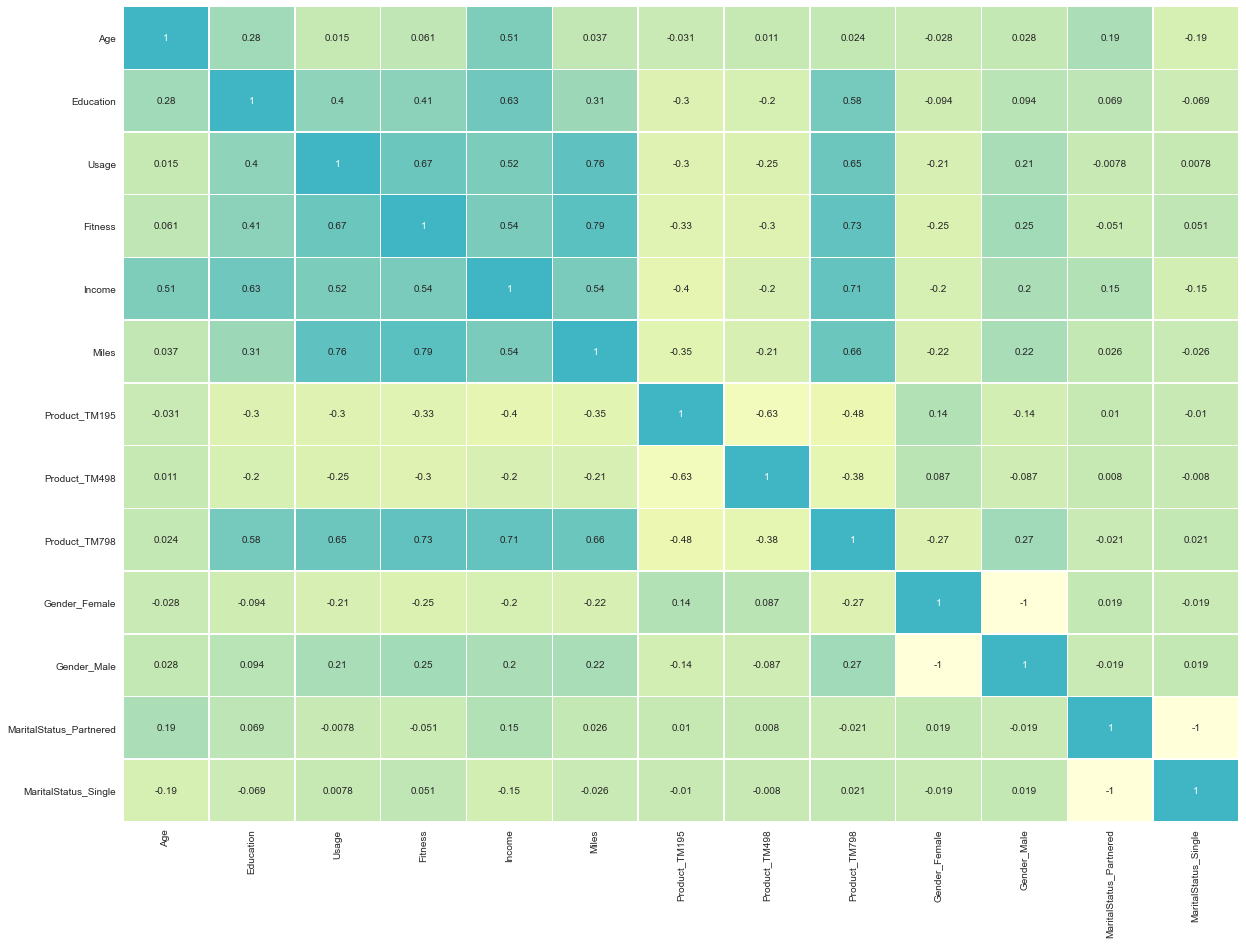

In [53]:
#run heatmap on new dataset

plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(), annot=True, cmap='YlGnBu', cbar=False, linewidths=.5, center = 1)

**Observations**

* Usage, Income, Fitness, Education, Miles, Age and Product TM798 are correlated

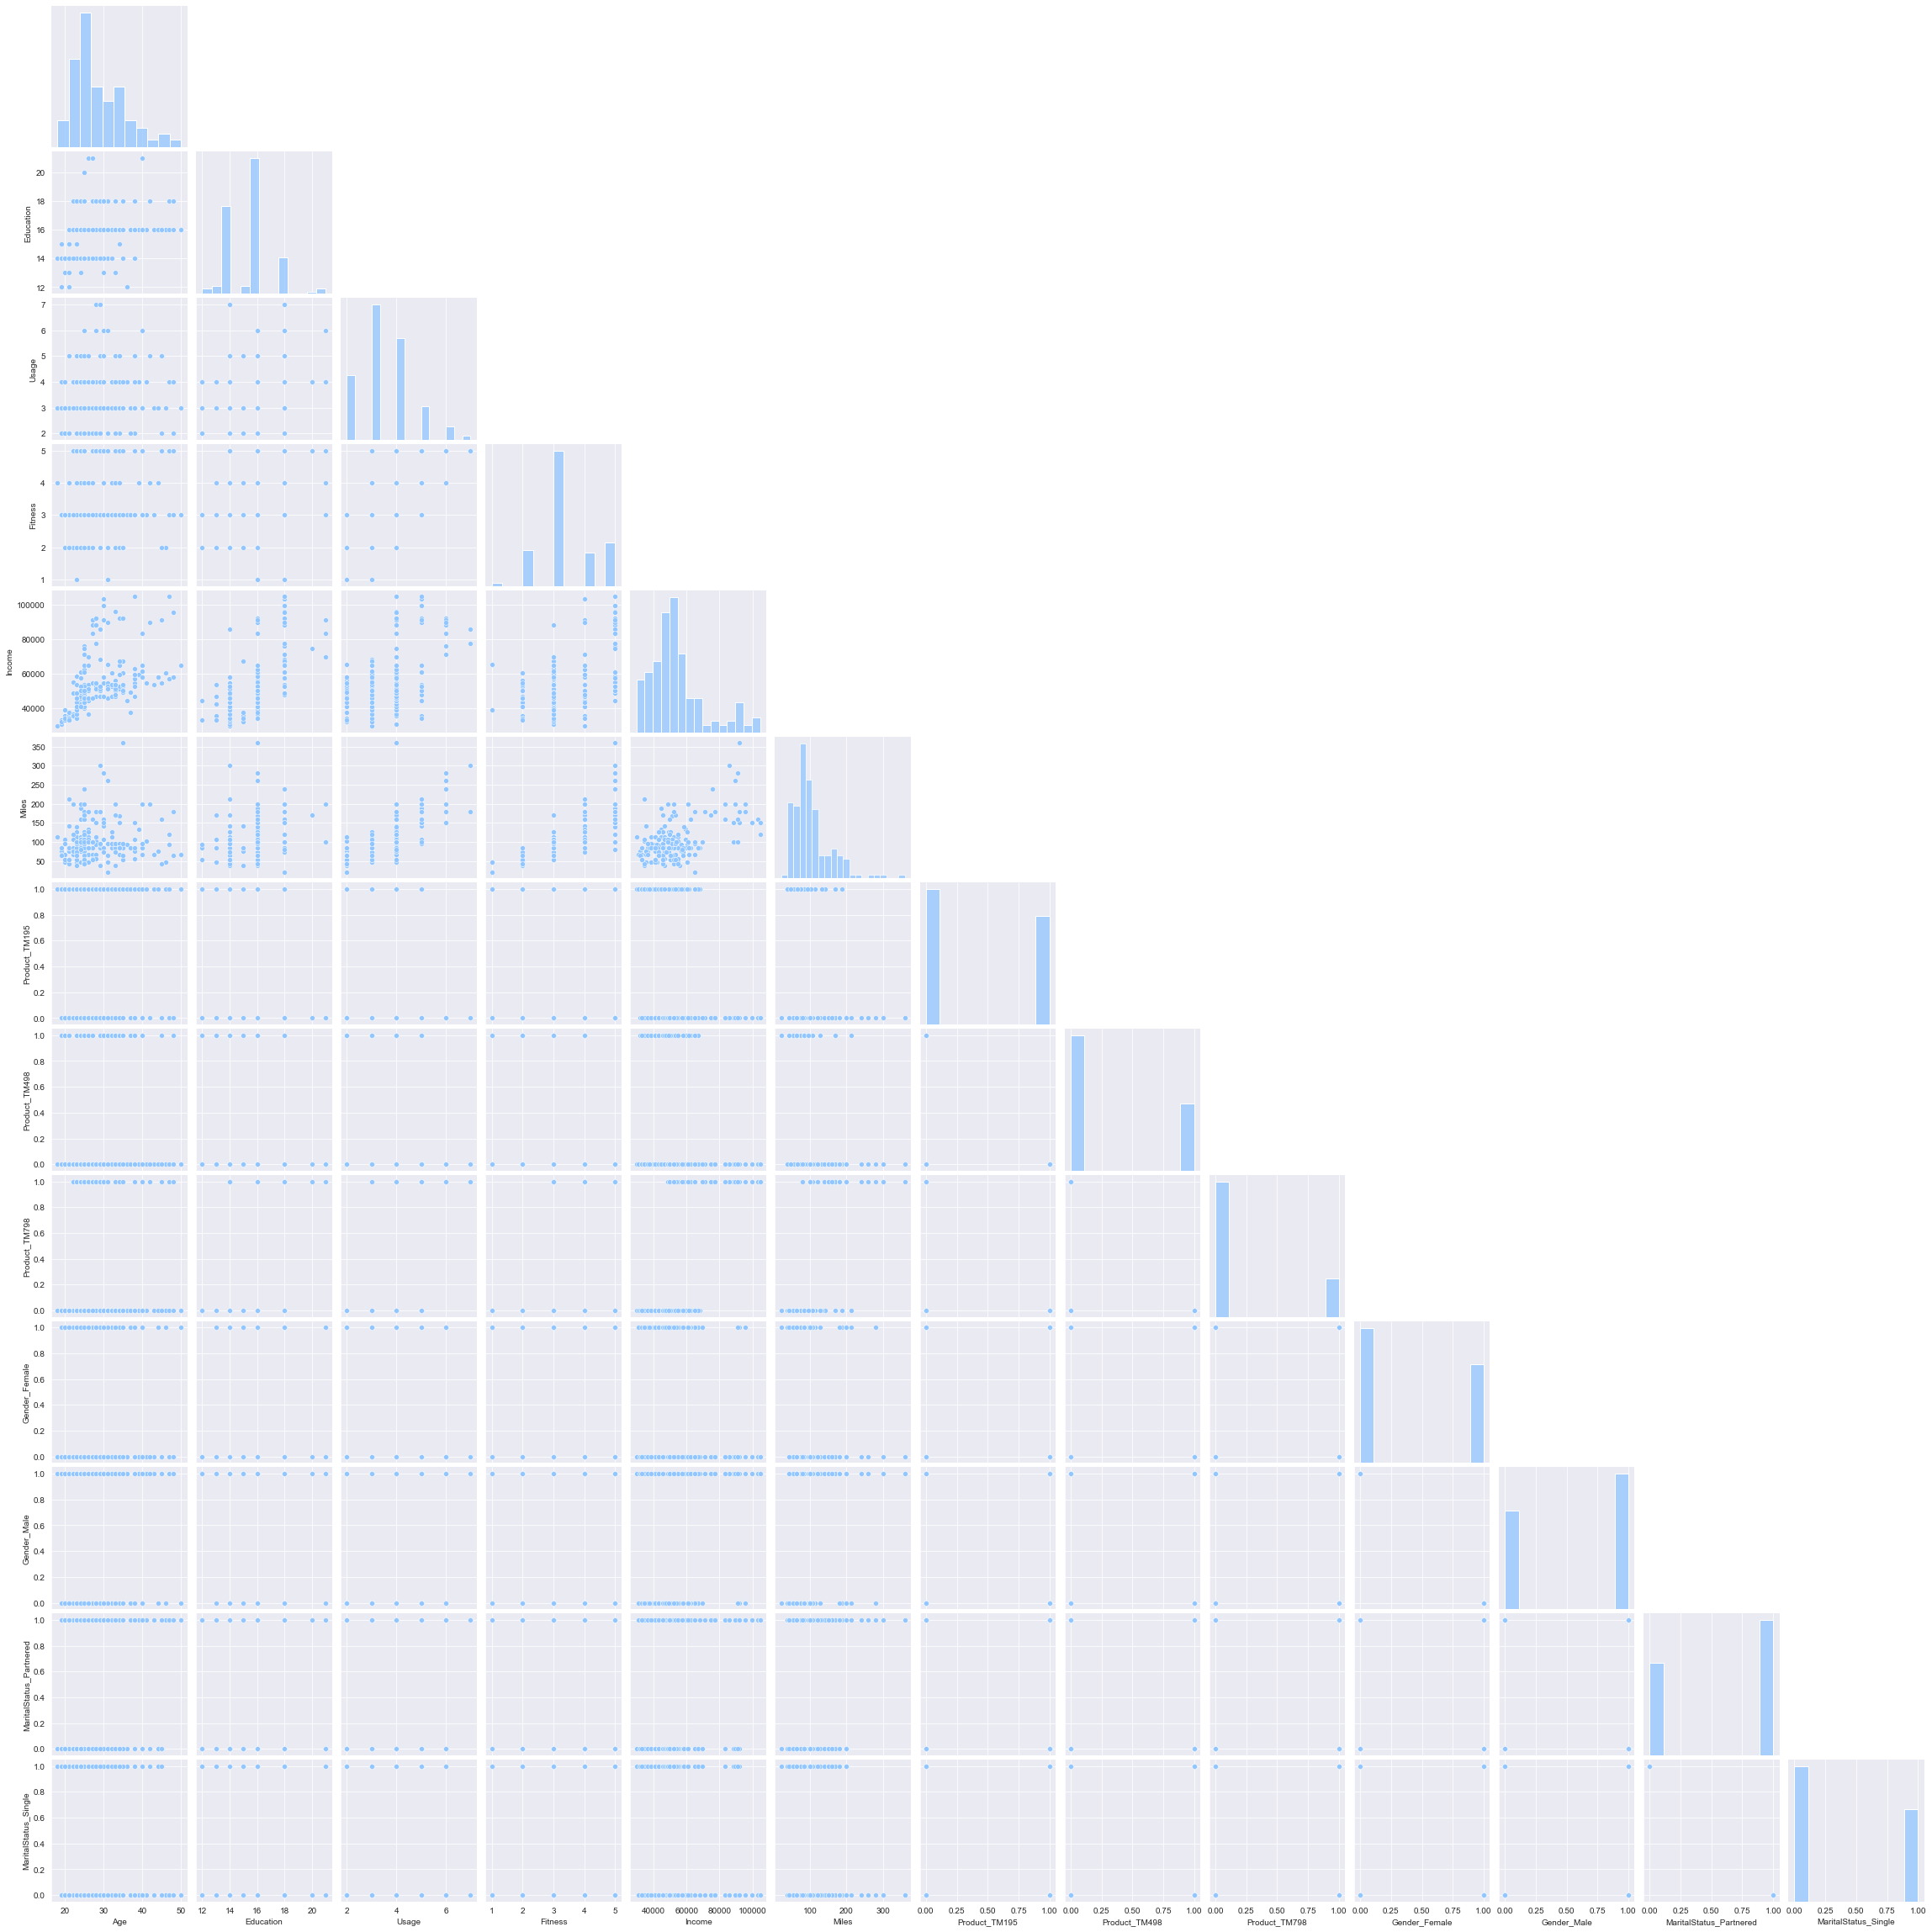

In [54]:
# run pair plot to double check numerical value relationships
sns.pairplot(df1, corner=True) #pair plot minus the corner